# Exploring NASA NEX-GDDP-CMIP6 Data via OpenVisus + Intake

This notebook demonstrates how to:
- Load climate data (e.g., temperature, precipitation) from NASA NEX-GDDP-CMIP6
- Subset by time, region (lat/lon), and resolution (quality)
- Visualize the result using `xarray` and `matplotlib`

The data is accessed via a custom `Intake` catalog that wraps `OpenVisus`.

Please make sure you have installed all libraries from `requirements.txt` file before proceeding.

Developed by `Aashish Panta`, `Kyo Lee` and `Valerio Pascucci` from University of Utah and NASA JPL

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OpenVisus as ov
import xarray as xr
import intake


### List Available Models, Variables, Scenario, Timeranges

In [2]:
# Load catalog
cat = intake.open_catalog("https://raw.githubusercontent.com/aashishpanta0/cmip6-intake-idx/main/cmip6_catalog.yml")

# List available models & variables
print("Models:", cat.nex_gddp_cmip6.list_models())
print("Variables:", cat.nex_gddp_cmip6.list_variables())
print("Scenarios:", cat.nex_gddp_cmip6.list_scenarios())

print("Timeranges:", cat.nex_gddp_cmip6.list_timeranges())


Models: ['ACCESS-CM2', 'CanESM5', 'CESM2', 'CMCC-CM2-SR5', 'EC-Earth3', 'GFDL-ESM4', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0']
Variables: ['hurs', 'huss', 'pr', 'rlds', 'rsds', 'sfcWind', 'tas', 'tasmax', 'tasmin']
Scenarios: ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']
Timeranges: {'historical': ('1950-01-01', '2014-12-31'), 'ssp126': ('2015-01-01', '2100-12-31'), 'ssp245': ('2015-01-01', '2100-12-31'), 'ssp370': ('2015-01-01', '2100-12-31'), 'ssp585': ('2015-01-01', '2100-12-31')}


### Open the catalog and set the variables

In [3]:
ds = cat.nex_gddp_cmip6(model="ACCESS-CM2", 
                        variable="tas", 
                        scenario="ssp245", 
                        timestamp="2015-10-15",
                        )

ds

nex_gddp_cmip6:
  args:
    cached: false
    model: ACCESS-CM2
    quality: 0
    scenario: ssp245
    timestamp: '2015-10-15'
    variable: tas
  description: NEX-GDDP-CMIP6 reader
  driver: intake_nexgddp.catalog.NexGDDPCatalog
  metadata:
    catalog_dir: https://raw.githubusercontent.com/aashishpanta0/cmip6-intake-idx/main


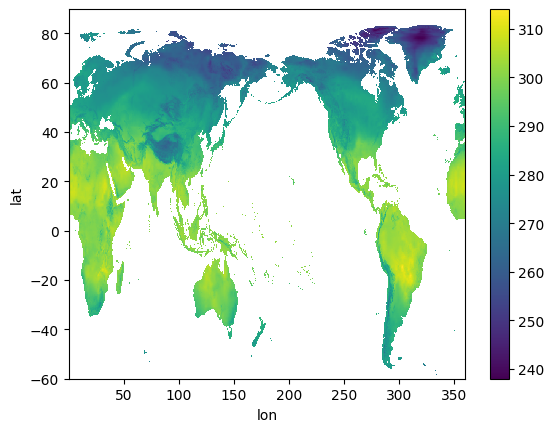

In [4]:
ds.read().plot()

### Parameters manipulation
quality: Change the resolution of data. 0 is full resolution, -2 is 1/4th, -4 is 1/8th and so on.

lat_range, lon_range: Subset your region of interest

In [5]:
ds = cat.nex_gddp_cmip6(model="ACCESS-CM2", 
                        variable="tas", 
                        scenario="ssp245", 
                        timestamp="2015-10-15",
                        quality=-2,
                        lat_range=(0, 40),
                        lon_range=(0, 120),
                        )

ds

nex_gddp_cmip6:
  args:
    cached: false
    lat_range: !!python/tuple
    - 0
    - 40
    lon_range: !!python/tuple
    - 0
    - 120
    model: ACCESS-CM2
    quality: -2
    scenario: ssp245
    timestamp: '2015-10-15'
    variable: tas
  description: NEX-GDDP-CMIP6 reader
  driver: intake_nexgddp.catalog.NexGDDPCatalog
  metadata:
    catalog_dir: https://raw.githubusercontent.com/aashishpanta0/cmip6-intake-idx/main


### Plot using default xarray tool

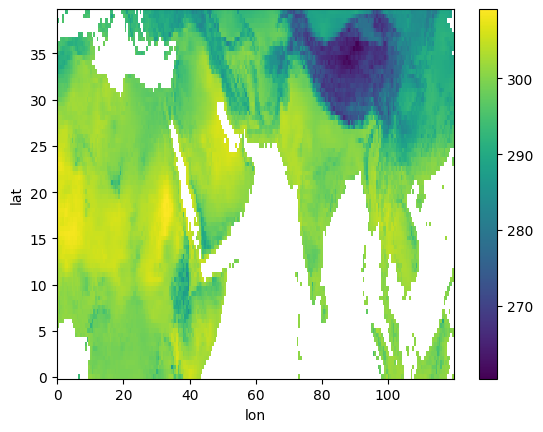

In [6]:
ds.read().plot()

### Reading intake as xarray

In [7]:
xr_ds=ds.read()
xr_ds

<xarray.DataArray (lat: 80, lon: 240)> Size: 77kB
array([[      nan,       nan,       nan, ...,       nan,       nan,
        301.21643],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ..., 301.21484,       nan,
              nan],
       ...,
       [294.0506 ,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ..., 289.22516, 289.12592,
              nan],
       [      nan,       nan,       nan, ..., 288.74002, 288.35687,
              nan]], shape=(80, 240), dtype=float32)
Coordinates:
  * lat      (lat) float64 640B 0.072 0.5716 1.071 1.571 ... 38.54 39.04 39.54
  * lon      (lon) float64 2kB 0.125 0.6248 1.125 1.624 ... 118.6 119.1 119.6

### Plot using Matplotlib

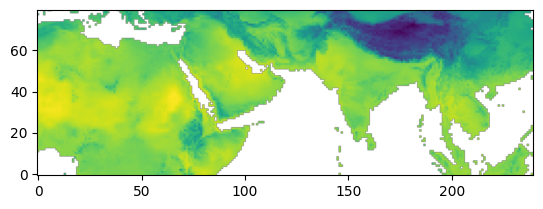

In [8]:
data=xr_ds.values
plt.imshow(data, cmap='viridis',origin='lower')

### Select Time Ranges
Specify start date and end date

In [9]:
da = cat.nex_gddp_cmip6(
    model="ACCESS-CM2",
    variable="tas",
    scenario="ssp245",
    start_date="2015-10-10",
    end_date="2015-10-20",
    quality=-4,
).read()
print(da.dims) 
print(da.time.values[:3])


('time', 'lat', 'lon')
['2015-10-10T00:00:00' '2015-10-11T00:00:00' '2015-10-12T00:00:00']


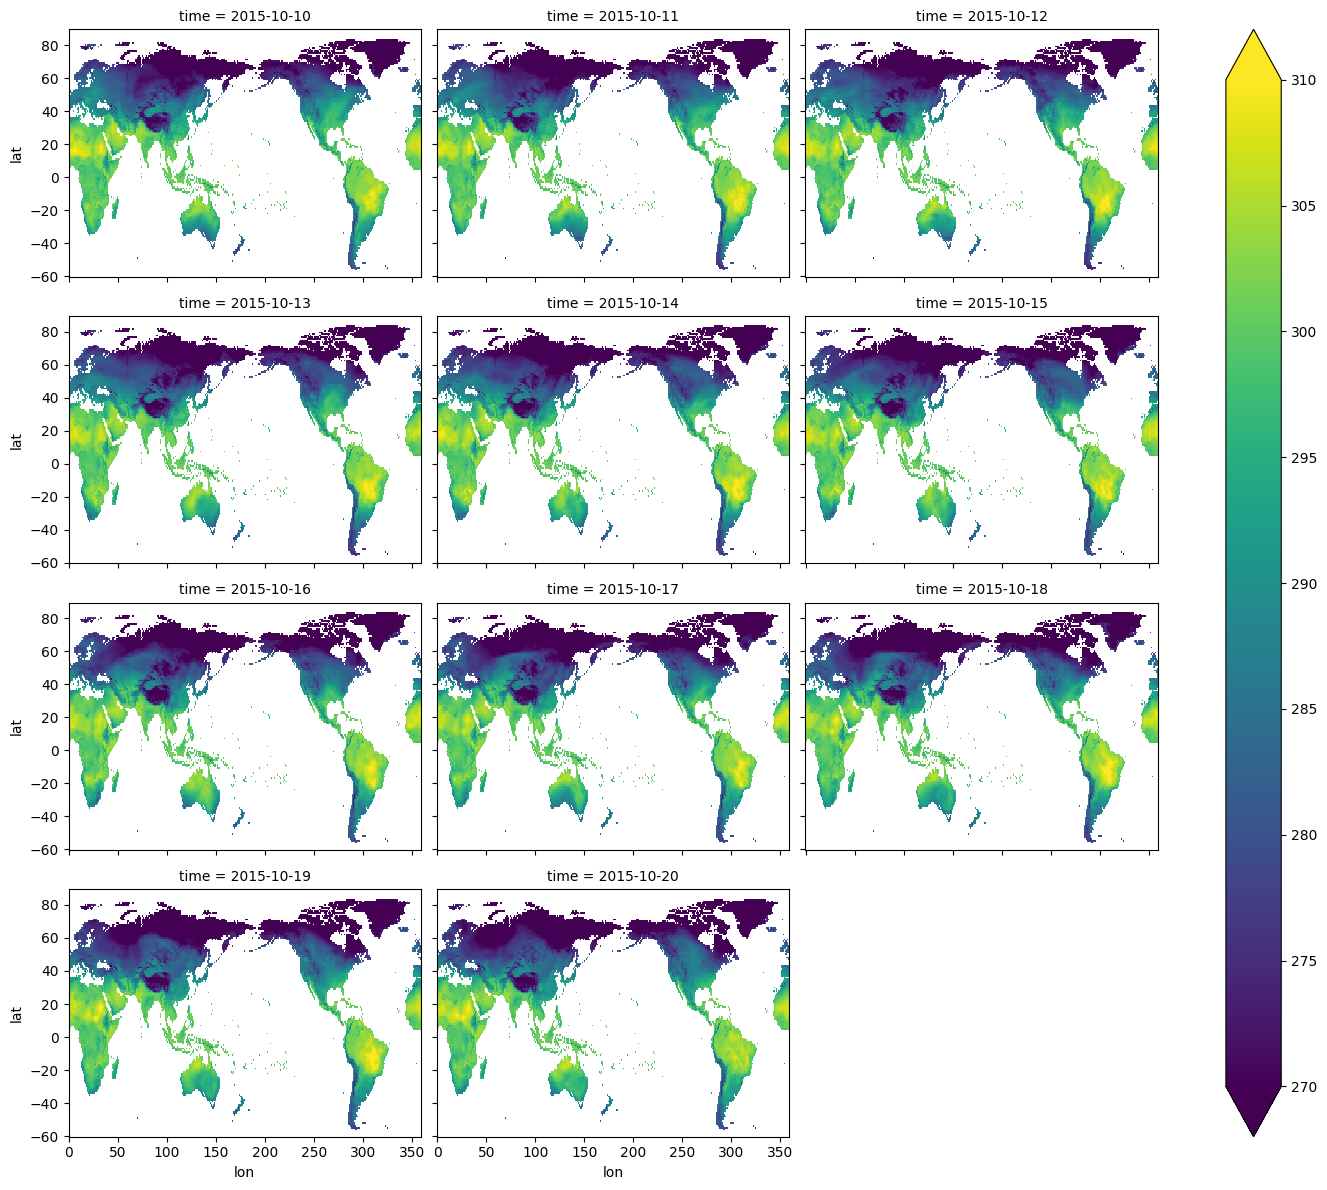

In [10]:
da.plot.imshow(col="time", col_wrap=3, cmap="viridis", aspect=1.5, vmin=270, vmax=310)

### Select Specific Dates

Pass your dates of interest as timestamps

In [11]:
dates = ["2015-10-10","2015-10-12","2015-10-15"]
da = cat.nex_gddp_cmip6(
    model="ACCESS-CM2",
    variable="hurs",
    scenario="ssp245",
    timestamps=dates,
    quality=0,
    lat_range=(0, 40),
    lon_range=(0, 120),
).read()


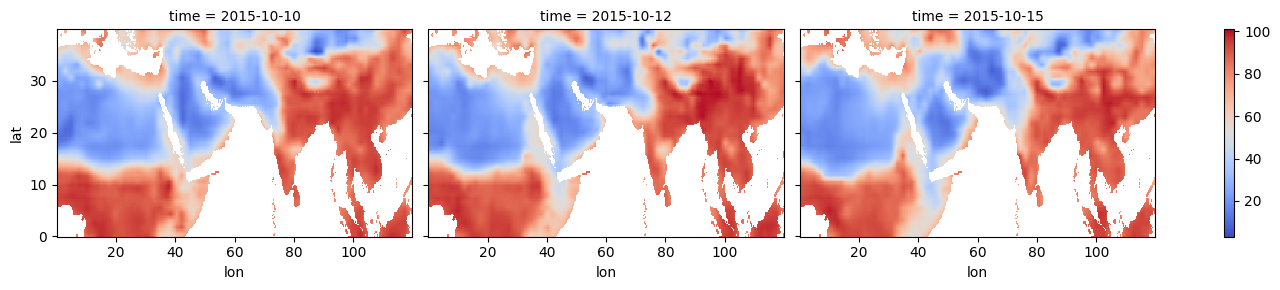

In [12]:
da.plot.imshow(col="time", col_wrap=3, cmap="coolwarm", aspect=1.5)

Please contact [Aashish Panta](mailto:aashishpanta0@gmail.com) if you have any concerns or questions.
